'''

Edyta Bartoś, Marcin Grelewicz
Dataset: Vicon Physical Action Data Set from http://sites.google.com/site/ttheod/
for building the classifier SVM-> Support Vector Machine, which is commonly 
used for supervised learning to analyze data and recognize patterns, by dividing
data on hyperplane with maximum margin possible. 

Attribute Information: Each file in the dataset contains in overall 28 columns 
The dataset consists of 10 normal, and 10 aggressive physical actions.
Normal: Bowing, Clapping, Handshaking, Hugging, Jumping, Running, Seating, Standing, Walking, Waving
Aggressive: Elbowing, Frontkicking, Hamering, Headering, Kneeing, Pulling, Punching, Pushing, Sidekicking, Slapping
Each of them consist of 27 atributes. 
We chose 2 normal and agressive physical actions for our classifier purposes. 


'''


In [1]:
# load datasets
import pandas as pd

aggresive1 = pd.read_csv("Slapping.txt",sep='\s+', header=None)
normal1 = pd.read_csv("Clapping.txt",sep='\s+', header=None)
aggresive2 = pd.read_csv("Punching.txt",sep='\s+', header=None)
normal2 = pd.read_csv("Running.txt",sep='\s+', header=None)

normal1 = normal1.dropna()
aggresive1 = aggresive1.dropna()
normal2 = normal2.dropna()
aggresive2 = aggresive2.dropna()

In [2]:
#print 1 dataset as example:
aggresive2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,620.589,-1040.063,1677.229,372.366,-986.674,1189.088,423.940,-967.083,1375.234,...,430.527,396.971,-788.095,121.707,795.019,-1065.274,397.361,731.341,-1209.246,130.062
1,1,620.589,-1040.063,1677.229,372.366,-986.674,1189.088,423.940,-967.083,1375.234,...,430.357,397.009,-788.169,121.726,795.019,-1065.274,397.361,731.341,-1209.246,130.062
2,2,620.589,-1040.063,1677.229,372.366,-986.674,1189.088,423.940,-967.083,1375.234,...,430.357,397.009,-788.169,121.726,795.373,-1065.553,397.526,731.403,-1209.328,130.106
3,3,619.724,-1040.063,1677.229,372.366,-986.674,1189.088,423.940,-967.083,1375.234,...,430.357,397.009,-788.169,121.726,795.373,-1065.553,397.526,731.403,-1209.328,130.106
4,4,619.724,-1039.983,1677.278,372.366,-986.674,1189.088,423.940,-967.083,1375.234,...,430.357,397.009,-788.169,121.726,795.373,-1065.553,397.526,731.403,-1209.328,130.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,4228,688.541,633.562,1668.408,742.243,477.098,1129.025,645.982,474.155,1294.797,...,434.797,806.599,468.987,132.095,470.327,958.602,446.660,549.105,1070.874,165.156
4229,4229,682.865,641.418,1663.992,742.243,477.098,1129.025,645.982,474.155,1294.797,...,434.797,806.599,468.987,132.095,470.327,958.602,446.660,549.105,1070.874,165.156
4230,4230,682.865,641.418,1663.992,742.243,477.098,1129.025,645.982,474.155,1294.797,...,434.797,806.599,468.987,132.095,470.327,958.602,446.660,549.105,1070.874,165.156
4231,4231,682.865,641.418,1663.992,730.051,480.214,1125.510,634.259,480.966,1291.966,...,434.797,806.599,468.987,132.095,470.327,958.602,446.660,549.105,1070.874,165.156


In [3]:
#print dataset normal
normal1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,-152.669,-6.998,1847.756,-223.973,289.343,1149.550,-166.845,304.506,966.105,...,488.331,-276.849,196.385,170.342,-266.258,-165.123,485.154,-252.534,-163.071,171.513
1,1,-155.432,-6.857,1847.668,-225.410,289.117,1149.344,-167.773,303.989,965.732,...,488.331,-276.849,196.385,170.342,-266.258,-165.123,485.154,-252.534,-163.071,171.513
2,2,-155.432,-6.857,1847.668,-225.410,289.117,1149.344,-167.773,303.989,965.732,...,488.331,-277.143,196.436,170.429,-266.258,-165.123,485.154,-252.534,-163.071,171.513
3,3,-155.432,-6.857,1847.668,-225.410,289.117,1149.344,-167.773,303.989,965.732,...,488.182,-277.143,196.436,170.429,-266.258,-165.123,485.154,-252.534,-163.071,171.513
4,4,-155.432,-6.857,1847.668,-225.410,289.117,1149.344,-167.773,303.989,965.732,...,488.182,-277.143,196.436,170.429,-266.258,-165.123,485.154,-252.980,-162.778,171.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,2062,-232.641,36.819,1852.968,-22.065,210.323,1365.087,47.146,80.096,1487.901,...,488.886,-275.009,197.036,171.422,-258.323,-161.949,486.229,-250.433,-162.083,172.052
2063,2063,-232.641,36.819,1852.968,-22.065,210.323,1365.087,47.146,80.096,1487.901,...,488.966,-275.077,197.012,171.310,-258.323,-161.949,486.229,-250.433,-162.083,172.052
2064,2064,-232.641,36.819,1852.968,-22.065,210.323,1365.087,47.146,80.096,1487.901,...,488.966,-275.077,197.012,171.310,-258.323,-161.949,486.229,-250.433,-162.083,172.052
2065,2065,-232.641,36.819,1852.968,-22.065,210.323,1365.087,47.146,80.096,1487.901,...,488.966,-275.077,197.012,171.310,-258.356,-161.948,486.198,-250.546,-162.112,172.244


In [4]:
#we create 2 classes "agressive" and "normal" with binary description

n1_len = len(normal1)
n2_len = len(normal2)
a1_len = len(aggresive1)
a2_len = len(aggresive2)

normal1_class = [0 for i in range(n1_len)]  
aggresive1_class = [1 for i in range(a1_len)]
normal2_class = [0 for i in range(n2_len)]  
aggresive2_class = [1 for i in range(a2_len)]

dat1_0 = pd.DataFrame(normal1_class, columns=None)
dat1_1 = pd.DataFrame(aggresive1_class, columns=None)
dat2_0 = pd.DataFrame(normal2_class, columns=None)
dat2_1 = pd.DataFrame(aggresive2_class, columns=None)

aggresive_tmp1 = pd.concat([aggresive1, dat1_1], axis=1)
normal_tmp1 = pd.concat([normal1, dat1_0], axis=1)
aggresive_tmp2 = pd.concat([aggresive2, dat2_1], axis=1)
normal_tmp2 = pd.concat([normal2, dat2_0], axis=1)

aggresive = pd.concat([aggresive_tmp1, aggresive_tmp2], axis=0)
normal = pd.concat([normal_tmp1, normal_tmp2], axis=0)


In [5]:
#after adding last column
normal

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,0
0,0,-152.669,-6.998,1847.756,-223.973,289.343,1149.550,-166.845,304.506,966.105,...,-276.849,196.385,170.342,-266.258,-165.123,485.154,-252.534,-163.071,171.513,0
1,1,-155.432,-6.857,1847.668,-225.410,289.117,1149.344,-167.773,303.989,965.732,...,-276.849,196.385,170.342,-266.258,-165.123,485.154,-252.534,-163.071,171.513,0
2,2,-155.432,-6.857,1847.668,-225.410,289.117,1149.344,-167.773,303.989,965.732,...,-277.143,196.436,170.429,-266.258,-165.123,485.154,-252.534,-163.071,171.513,0
3,3,-155.432,-6.857,1847.668,-225.410,289.117,1149.344,-167.773,303.989,965.732,...,-277.143,196.436,170.429,-266.258,-165.123,485.154,-252.534,-163.071,171.513,0
4,4,-155.432,-6.857,1847.668,-225.410,289.117,1149.344,-167.773,303.989,965.732,...,-277.143,196.436,170.429,-266.258,-165.123,485.154,-252.980,-162.778,171.184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,1628,1062.921,636.728,1667.467,1282.924,962.618,1221.719,1310.654,811.323,1101.642,...,0.000,0.000,0.000,1122.635,860.400,361.688,0.000,0.000,0.000,0
1629,1629,1062.921,636.728,1667.467,1282.924,961.118,1219.274,1310.654,811.323,1101.642,...,0.000,0.000,0.000,1122.635,860.400,361.688,0.000,0.000,0.000,0
1630,1630,1062.921,636.728,1667.467,1282.924,961.118,1219.274,1310.654,811.323,1101.642,...,0.000,0.000,0.000,1122.635,860.400,361.688,0.000,0.000,0.000,0
1631,1631,1069.949,630.613,1665.901,1282.924,961.118,1219.274,1310.654,811.323,1101.642,...,0.000,0.000,0.000,1122.635,860.400,361.688,0.000,0.000,0.000,0


In [6]:
# Merge agressive and normal dataset 
data = aggresive.iloc[:, 1:].merge(normal.iloc[:, 1:], how='outer')
#print('Data shape: ', data.shape)

In [7]:
#all merged datasets, after adding last column
data

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,0
0,600.770,909.854,1602.137,769.081,777.361,976.898,738.639,724.270,794.149,369.595,...,772.147,719.162,119.948,470.169,963.309,407.080,556.683,1013.144,106.883,1
1,600.770,909.854,1602.137,769.081,777.361,976.898,738.639,724.270,794.149,369.595,...,772.074,719.096,120.079,470.169,963.309,407.080,556.683,1013.144,106.883,1
2,600.770,909.854,1602.137,768.339,777.331,976.775,737.195,724.051,794.329,369.595,...,772.074,719.096,120.079,470.169,963.309,407.080,556.683,1013.144,106.883,1
3,600.770,909.854,1602.137,768.339,777.331,976.775,737.195,724.051,794.329,369.728,...,772.074,719.096,120.079,470.169,963.309,407.080,556.683,1013.144,106.883,1
4,600.770,909.854,1602.137,768.339,777.331,976.775,737.195,724.051,794.329,369.728,...,772.074,719.096,120.079,470.169,963.309,407.080,556.683,1013.144,106.883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11451,1062.921,636.728,1667.467,1282.924,962.618,1221.719,1310.654,811.323,1101.642,774.478,...,0.000,0.000,0.000,1122.635,860.400,361.688,0.000,0.000,0.000,0
11452,1062.921,636.728,1667.467,1282.924,961.118,1219.274,1310.654,811.323,1101.642,774.478,...,0.000,0.000,0.000,1122.635,860.400,361.688,0.000,0.000,0.000,0
11453,1062.921,636.728,1667.467,1282.924,961.118,1219.274,1310.654,811.323,1101.642,785.494,...,0.000,0.000,0.000,1122.635,860.400,361.688,0.000,0.000,0.000,0
11454,1069.949,630.613,1665.901,1282.924,961.118,1219.274,1310.654,811.323,1101.642,785.494,...,0.000,0.000,0.000,1122.635,860.400,361.688,0.000,0.000,0.000,0


In [8]:
# split data for X- atributes, Y-quality (reference)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

top correlations:  Int64Index([19, 16, 22, 1, 25], dtype='int64')


[(-1.0, 1.0), Text(0, 0.5, 'Pearson correlation')]

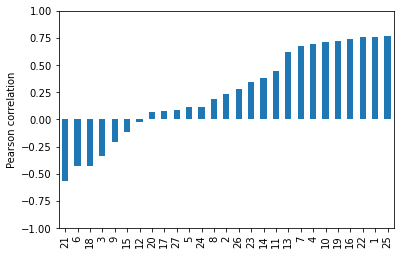

In [9]:
## Pearson pairwise correlation to show which features are most correlated:
correlations = X.corrwith(y)
correlations.sort_values(inplace=True)

fields = correlations.map(abs).sort_values().iloc[-5:].index
## print top absolute correlations:
print('top correlations: ', fields)

## Plot correlation bars:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='Pearson correlation')

<AxesSubplot:xlabel='0', ylabel='count'>

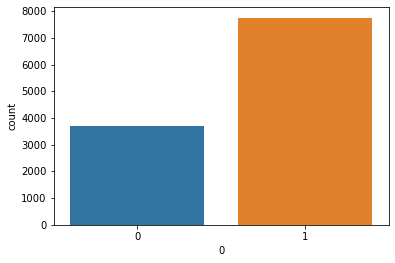

In [10]:
# Agressive- 1, normal- 0;
import seaborn as sns
sns.countplot(y)

In [11]:
from sklearn.preprocessing import scale, StandardScaler

## Scale values:
scaler = StandardScaler()
X = scaler.fit_transform(X[fields])
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [12]:
# Return contigous flattened array (1 dimensional array)
import numpy as np
y = np.ravel(y)

In [13]:
from sklearn.model_selection import train_test_split

## Split data to train and test portions:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50, shuffle=True)

## Check if train and test have the same size:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8592, 5) (8592,)
(2864, 5) (2864,)


In [14]:
## Prediction without tunning hyperparameters
from sklearn import svm
from sklearn.metrics import classification_report

svc = svm.SVC(kernel='linear', gamma=0.1, C=10).fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94       929
           1       0.95      1.00      0.98      1935

    accuracy                           0.97      2864
   macro avg       0.98      0.95      0.96      2864
weighted avg       0.97      0.97      0.97      2864



In [15]:
from sklearn.metrics import confusion_matrix

## Creation of confusion matrix
metrics = list()
cm = dict()

## Confusion matrix:
cm = confusion_matrix(y_test, y_pred)

              Model
precision  0.967660
recall     0.966131
fscore     0.965625
accuracy   0.966131


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

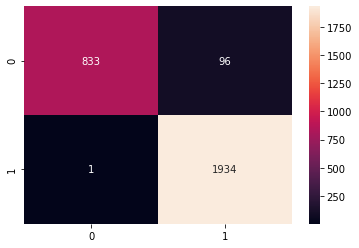

In [16]:
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
import matplotlib.pyplot as plt

## Precision, recall, f-score from the multi-class support function
precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')

## The usual way to calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy}, name='Model'))
metrics = pd.concat(metrics, axis=1)

print(metrics)

plot = sns.heatmap(cm, annot=True, fmt='d');
plt.tight_layout

In [17]:
## (one-time run) GridSearchCV to tune hyperparameters for the SVM:

from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[.001, .005, .01, .1, .5], 'gamma':[1, 2, 4, 5, 7, 10]}
svc = svm.SVC(gamma='scale')
gscv = GridSearchCV(svc, param_grid=parameters, cv=None)
gscv.fit(X_train, y_train)

## printing the best parameters:
print(gscv.best_estimator_)
print(gscv.best_params_)

SVC(C=0.1, gamma=5)
{'C': 0.1, 'gamma': 5, 'kernel': 'rbf'}


In [18]:
## Tunning
svc = svm.SVC(kernel='rbf', gamma=5, C=0.1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [19]:
## Creation of confusion matrix after fine-tuning 
metrics = list()
cm = dict()

## confusion matrix:
cm = confusion_matrix(y_test, y_pred)

           Model
precision    1.0
recall       1.0
fscore       1.0
accuracy     1.0


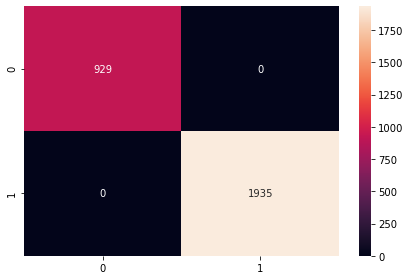

In [20]:
# Precision, recall, f-score from the multi-class support function
precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')

# The usual way to calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'accuracy':accuracy}, name='Model'))
metrics = pd.concat(metrics, axis=1)

print(metrics)

plot = sns.heatmap(cm, annot=True, fmt='d');
plt.tight_layout()